Note: data1 is 80% trainig data and data2 is 20% testing data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Reading of data

In [2]:
data = pd.read_csv("monthly data.csv",parse_dates=True)
data

,Date,Combined
0,2013-01-01,113.2
1,2013-02-01,113.9
2,2013-03-01,113.5
3,2013-04-01,114.7
4,2013-05-01,117.8
...,...,...
108,2022-01-01,172.0
109,2022-02-01,170.4
110,2022-03-01,169.6
111,2022-04-01,175.1


In [3]:
data.isna().sum()

Date        0
Combined    0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      113 non-null    object 
 1   Combined  113 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.9+ KB


In [5]:
data["Date"] = pd.to_datetime(data["Date"])
data["Date"]

0     2013-01-01
1     2013-02-01
2     2013-03-01
3     2013-04-01
4     2013-05-01
         ...    
108   2022-01-01
109   2022-02-01
110   2022-03-01
111   2022-04-01
112   2022-05-01
Name: Date, Length: 113, dtype: datetime64[ns]

In [6]:
data

,Date,Combined
0,2013-01-01,113.2
1,2013-02-01,113.9
2,2013-03-01,113.5
3,2013-04-01,114.7
4,2013-05-01,117.8
...,...,...
108,2022-01-01,172.0
109,2022-02-01,170.4
110,2022-03-01,169.6
111,2022-04-01,175.1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      113 non-null    datetime64[ns]
 1   Combined  113 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.9 KB


In [8]:
data.set_index("Date",inplace = True)

In [9]:
data   # calling date as an index

,Combined
Date,
2013-01-01,113.2
2013-02-01,113.9
2013-03-01,113.5
2013-04-01,114.7
2013-05-01,117.8
...,...
2022-01-01,172.0
2022-02-01,170.4
2022-03-01,169.6


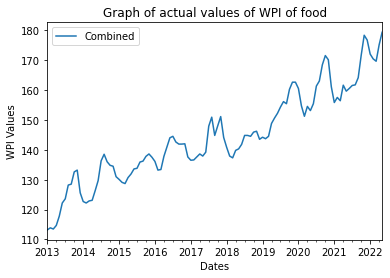

In [10]:
data.plot()
plt.title('Graph of actual values of WPI of food')
plt.xlabel('Dates')
plt.ylabel('WPI Values')
plt.show()

In [11]:
data1 = data.iloc[0:96]
data1

,Combined
Date,
2013-01-01,113.2
2013-02-01,113.9
2013-03-01,113.5
2013-04-01,114.7
2013-05-01,117.8
...,...
2020-08-01,163.0
2020-09-01,168.4
2020-10-01,171.5


## Checking whether the data is stationary or not

In [12]:
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(data1)
adftest

(-0.6616691978007861,
 0.8564298816341092,
 7,
 88,
 {'1%': -3.506944401824286,
  '5%': -2.894989819214876,
  '10%': -2.584614550619835},
 388.4933742339072)

ADF: 1.123480477030908
p value:0.9954121199565441
no of lags: 10
no of obs used for ADF Regression and critical values calculation: 102
critical values: '1%': -3.4961490537199116,
  '5%': -2.8903209639580556,
  '10%': -2.5821223452518263

In [13]:
print(" pvalue of adfuller test is:", adftest[1])

 pvalue of adfuller test is: 0.8564298816341092


If p value <=0.05 then we reject null hypothesis(data is stationary)

here p-value is greater than 0.05 so we accept null hypothesis (data is not stationary) 

### To make data stationary

In [14]:
data1["Combined first difference"]=data1-data1.shift(1)
data1

,Combined,Combined first difference
Date,,
2013-01-01,113.2,NaN
2013-02-01,113.9,0.7
2013-03-01,113.5,-0.4
2013-04-01,114.7,1.2
2013-05-01,117.8,3.1
...,...,...
2020-08-01,163.0,1.7
2020-09-01,168.4,5.4
2020-10-01,171.5,3.1


In [15]:
adftest = adfuller(data1["Combined first difference"].dropna())
adftest

(-7.596784101700885,
 2.448435223187168e-11,
 6,
 88,
 {'1%': -3.506944401824286,
  '5%': -2.894989819214876,
  '10%': -2.584614550619835},
 382.94314221452635)

Now data is stationary

In [16]:
data1["Combined 12 difference"] = data1['Combined']-data1['Combined'].shift(12)
data1["Combined 12 difference"]

Date
2013-01-01     NaN
2013-02-01     NaN
2013-03-01     NaN
2013-04-01     NaN
2013-05-01     NaN
              ... 
2020-08-01     6.9
2020-09-01    13.0
2020-10-01    11.3
2020-11-01     7.5
2020-12-01    -1.5
Name: Combined 12 difference, Length: 96, dtype: float64

## ACF and PACF Graph

In [17]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

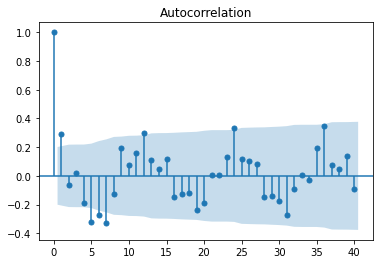

In [18]:
#fig = plt.figure(figsize=(12,8))
acf = plot_acf(data1["Combined first difference"].dropna(),lags=40)

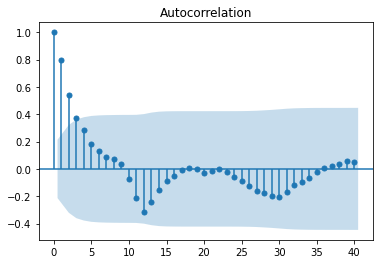

In [19]:
acf12 = plot_acf(data1["Combined 12 difference"].dropna(),lags=40)

from acf12_second graph we get the value of q = 3

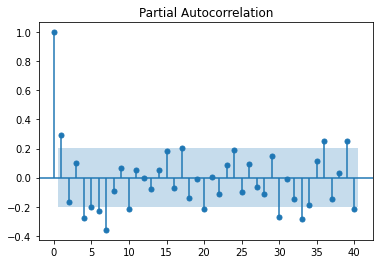

In [20]:
pacf = plot_pacf(data1["Combined first difference"].dropna(),lags=40)

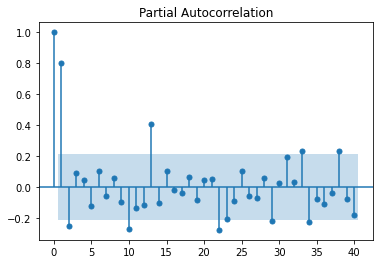

In [21]:
pacf12 = plot_pacf(data1["Combined 12 difference"].dropna(),lags=40)

From PACF we get the value of p = 9

## Sarima model fitting

In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [23]:
model_SARIMA = SARIMAX(data1["Combined"],order=(1,1,2),seasonal_order = (1,0,2,12))

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [24]:
model_SARIMA_fit = model_SARIMA.fit()

In [25]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           Combined   No. Observations:                   96
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -211.835
Date:                            Fri, 26 Aug 2022   AIC                            437.671
Time:                                    14:40:01   BIC                            455.548
Sample:                                01-01-2013   HQIC                           444.894
                                     - 12-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5915      0.290      2.040      0.041       0.023       1.160
ma.L1         -0.2945      0.267     -1.104      0.270      -0.817       0.229
ma.L2         -0.4335      0.104     -4.153      0.000      -0.638      -0.229
ar.S.L12       0.9555      0.053     17.905      0.000       0.851       1.060
ma.S.L12      -1.0329      0.150     -6.890      0.000      -1.327      -0.739
ma.S.L24       0.3313      0.161      2.052      0.040       0.015       0.648
sigma2         4.2848      0.559      7.667      0.000       3.189       5.380
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                16.50
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.44   Skew:                             0.75
Prob(H) (two-sided):                  0.31   Kurtosis:                         4.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Prediction of combined value

In [26]:
from datetime import datetime,timedelta
data1['pred_Sarima'] = model_SARIMA_fit.predict(start = datetime(2013,1,1),end = datetime(2020,12,1))
data1['pred_Sarima']

Date
2013-01-01      0.000000
2013-02-01    113.200240
2013-03-01    114.064346
2013-04-01    113.169371
2013-05-01    115.190867
                 ...    
2020-08-01    162.356429
2020-09-01    160.925704
2020-10-01    171.370279
2020-11-01    170.300993
2020-12-01    164.743073
Name: pred_Sarima, Length: 96, dtype: float64

## Residuals

In [27]:
data1['residuals'] = data1["Combined"]-data1['pred_Sarima']
data1['residuals']

Date
2013-01-01    113.200000
2013-02-01      0.699760
2013-03-01     -0.564346
2013-04-01      1.530629
2013-05-01      2.609133
                 ...    
2020-08-01      0.643571
2020-09-01      7.474296
2020-10-01      0.129721
2020-11-01     -0.200993
2020-12-01     -3.643073
Name: residuals, Length: 96, dtype: float64

In [28]:
data1

,Combined,Combined first difference,Combined 12 difference,pred_Sarima,residuals
Date,,,,,
2013-01-01,113.2,NaN,NaN,0.000000,113.200000
2013-02-01,113.9,0.7,NaN,113.200240,0.699760
2013-03-01,113.5,-0.4,NaN,114.064346,-0.564346
2013-04-01,114.7,1.2,NaN,113.169371,1.530629
2013-05-01,117.8,3.1,NaN,115.190867,2.609133
...,...,...,...,...,...
2020-08-01,163.0,1.7,6.9,162.356429,0.643571
2020-09-01,168.4,5.4,13.0,160.925704,7.474296
2020-10-01,171.5,3.1,11.3,171.370279,0.129721


<AxesSubplot:ylabel='Density'>

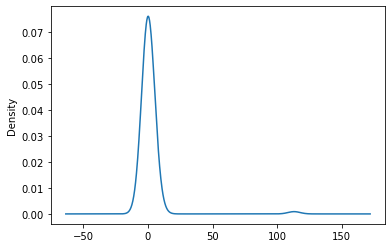

In [29]:
model_SARIMA_fit.resid.plot(kind = "kde")

In [30]:
from scipy import stats
stats.shapiro(data1["residuals"])

ShapiroResult(statistic=0.20258110761642456, pvalue=1.9159123420623415e-20)

p value greater than 0.05 means accept null hypothesis. 

Our null hypothesis : data is from normal distribution 

here Our pvalue is 1.974389 > 0.05 

so residuals are normally distributed

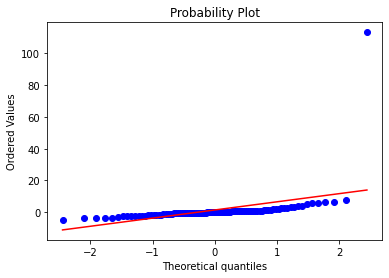

In [31]:
import pylab
from scipy import stats
stats.probplot(data1["residuals"],dist='norm',plot=pylab)
pylab.show()


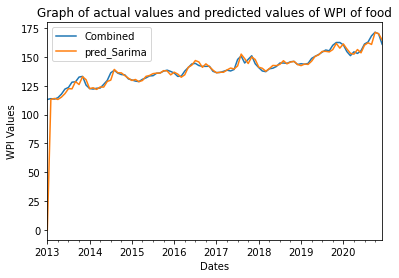

In [32]:
data1[['Combined','pred_Sarima']].plot()
plt.title('Graph of actual values and predicted values of WPI of food')
plt.xlabel('Dates')
plt.ylabel('WPI Values')
plt.show()

#### Original dataset and our predicted values are nearby same

## Prediction from Jan 2021 to May 2022

In [33]:
data2 = data.iloc[96:113,0:1]
data2

,Combined
Date,
2021-01-01,155.8
2021-02-01,157.5
2021-03-01,156.4
2021-04-01,161.6
2021-05-01,159.6
2021-06-01,160.5
2021-07-01,161.5
2021-08-01,161.7
2021-09-01,164.1


In [34]:
pred_Sarima1 = model_SARIMA_fit.predict(start = datetime(2021,1,1),end = datetime(2022,5,1))
pred_Sarima1

2021-01-01    158.221093
2021-02-01    157.845019
2021-03-01    158.676580
2021-04-01    161.244988
2021-05-01    162.382891
2021-06-01    163.871217
2021-07-01    166.819137
2021-08-01    167.692199
2021-09-01    165.643456
2021-10-01    167.748461
2021-11-01    169.254180
2021-12-01    167.103449
2022-01-01    166.092394
2022-02-01    163.741819
2022-03-01    163.028111
2022-04-01    165.802067
2022-05-01    166.052197
Freq: MS, Name: predicted_mean, dtype: float64

In [35]:
data2['pred_Sarima1'] = pred_Sarima1

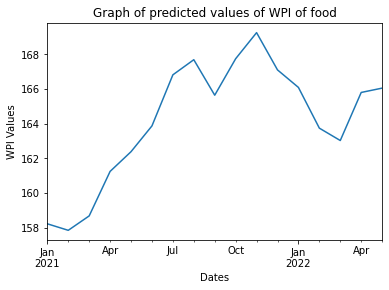

In [36]:
pred_Sarima1.plot()
plt.title('Graph of predicted values of WPI of food')
plt.xlabel('Dates')
plt.ylabel('WPI Values')
plt.show()

In [37]:
data['pred_Sarima1'] = pred_Sarima1

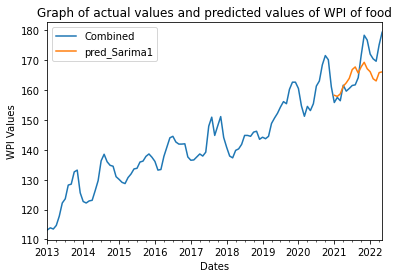

In [38]:
data[['Combined','pred_Sarima1']].plot()
plt.title('Graph of actual values and predicted values of WPI of food')
plt.xlabel('Dates')
plt.ylabel('WPI Values')
plt.show()

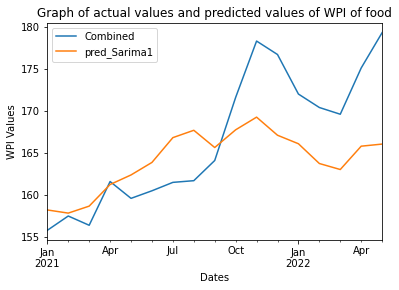

In [39]:
data2[['Combined','pred_Sarima1']].plot()
plt.title('Graph of actual values and predicted values of WPI of food')
plt.xlabel('Dates')
plt.ylabel('WPI Values')
plt.show()

## Future prediction from June 2022 to May 2023

In [40]:
pred_Sarima2 = model_SARIMA_fit.predict(start = datetime(2022,6,1),end = datetime(2023,5,1))
pred_Sarima2

2022-06-01    167.601890
2022-07-01    171.154176
2022-08-01    172.280494
2022-09-01    172.758440
2022-10-01    175.431839
2022-11-01    176.109769
2022-12-01    172.399021
2023-01-01    170.837868
2023-02-01    168.762968
2023-03-01    168.182212
2023-04-01    170.892610
2023-05-01    171.167014
Freq: MS, Name: predicted_mean, dtype: float64

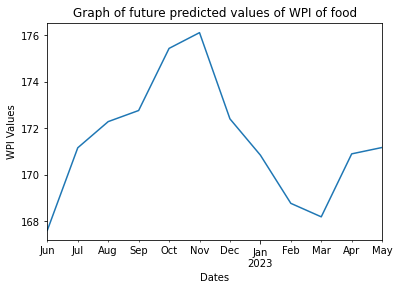

In [41]:
pred_Sarima2.plot()
plt.title('Graph of future predicted values of WPI of food')
plt.xlabel('Dates')
plt.ylabel('WPI Values')
plt.show()

In [42]:
import numpy as np
# Mean Squared Error
MSE = np.square(np.subtract(data2["Combined"],data2["pred_Sarima1"])).mean()

In [43]:
MSE

39.41840255455901